# <div align="center">MNIST: Handwritten Digit Classification<div>

 <div align="center"> Here we shall use a simple 3-layered <i>Multilayer Perceptron</i> to classify <b>MNIST</b> <i>Handwritten Dataset</i>.The data dataset consists of 60,000 small square 28×28 pixel grayscale training images of handwritten single digits between 0 and 9. A general architecture of the model to be used is shown below in the image.</div> 

![Model](./Model.jpg)

In [1]:
import numpy as np
import pandas as pd
import scipy.special
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


Data = pd.read_csv('./Data/train_60000.csv')
Test_Data = pd.read_csv('./Data/test_10000.csv')

#Dividing the Data into Training and Cross-Validation set
Train_Data = Data.iloc[0:42000,:]
CrossVal_data = Data.iloc[41999:,:]

#No of Training Samples
m1 = Train_Data.shape[0]
#No of Cross-Validation samples
m2 = CrossVal_data.shape[0]
#No of Testing samples
m3 = Test_Data.shape[0]

print("No of Training Samples",m1)
print("No of Cross-Validation samples",m2)
print("No of Testing samples",m3)

No of Training Samples 42000
No of Cross-Validation samples 18000
No of Testing samples 9999


In [21]:
#Feature Matrix
X = Train_Data.iloc[:,1:] 
#Label Matrix
y = Train_Data.iloc[:,0] #Here the 1st column represents the labesl 

#### Visualizing the data

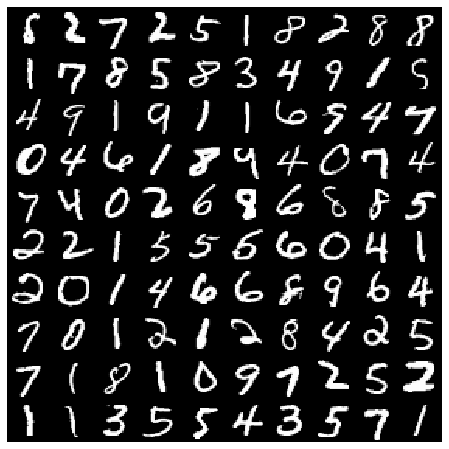

In [22]:
Index = random.sample(range(X.shape[0]),100)

def Convert_28x28(x):
    """
    Function that is handed a single np array with shape 1x400,
    crates a 20x20 image object from it, and returns it
    """
    width,height = 28,28 #The dimensions of the image
    x = x.values
    img = x.reshape(width,height)
    return img
def Display_Grid(indices_to_display):
    """
    Function that picks 100 random rows from X, creates a 28x28 pixel image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    
    width,height = 28,28 #The dimensions of the image
    nrows,ncols = 10,10 #The dimensions of the Image grid
    Grid = np.zeros((nrows*28,ncols*28)) #Each image is 20x20 therefor the Grid dimension is 200x200
    
    
    irow,icol = 0,0 #Index of the images in the Grid
    for index in indices_to_display:
        if(icol==ncols): #Here we are filling the Grid with images row wise 
            irow +=1
            icol  =0
        img = Convert_28x28(X.iloc[index,:])
        Grid[irow*height:irow*height+28,icol*width:icol*width+28] = img
        icol +=1
    
    fig = plt.figure(figsize=(20,8))
    plt.imshow(Grid,cmap = cm.Greys_r)
    plt.axis('off')
    
    
Display_Grid(Index)

#### Normalizinng the Training Data

In [12]:
#Mean Normalization
def M_Normalize(dataset):
    
    dataset = dataset.T   
    Norm_D = (dataset-dataset.mean())/(dataset.std())
    return Norm_D.T

X = M_Normalize(X)